In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("E:/Python/Spam Sms Detection/spam.csv", delimiter=',',encoding='latin-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.sample(10)

,v1,v2
1622,spam,U have a secret admirer who is looking 2 make ...
4778,ham,O we cant see if we can join denis and mina? O...
2311,spam,Congratulations! Thanks to a good friend U hav...
5019,ham,"It's cool, we can last a little while. Getting..."
5036,ham,(You didn't hear it from me)
2424,ham,Oh k k:)but he is not a big hitter.anyway good
2759,ham,"Can meh? Thgt some will clash... Really ah, i ..."
5074,spam,"This is the 2nd attempt to contract U, you hav..."
2685,spam,URGENT! We are trying to contact U. Todays dra...
2540,ham,"They said if its gonna snow, it will start aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df["v1"] = (df["v1"] == "spam").astype(int)

In [8]:
x, y=df['v2'].values,df['v1'].values

In [9]:
x=x.tolist()
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(x)

In [10]:
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

In [11]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)

test_pre = knn_model.predict(test_x)

In [12]:
print(classification_report(test_y,test_pre))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       957
           1       1.00      0.39      0.56       158

    accuracy                           0.91      1115
   macro avg       0.95      0.69      0.75      1115
weighted avg       0.92      0.91      0.90      1115



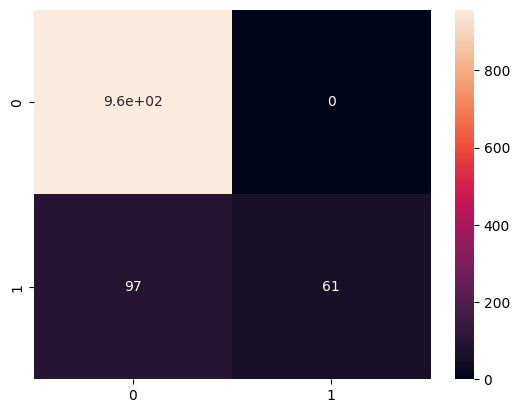

In [13]:
sns.heatmap(confusion_matrix(test_y,test_pre), annot=True)
plt.show()
